In [298]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [299]:
data = pd.read_csv("C:\\Users\\Bala Vignesh.A\\Desktop\\Assignments\\SCMA 632\\NSSO68.csv", low_memory=False)

In [300]:
display(data)

,slno,grp,Round_Centre,FSU_number,Round,Schedule_Number,Sample,Sector,state,State_Region,...,sauce_jam_v,Othrprocessed_v,Beveragestotal_v,foodtotal_v,foodtotal_q,state_1,Region,fruits_df_tt_v,fv_tot,non_veg
0,1,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.000000,1141.492400,30.942394,GUJ,2,12.000000,154.180000,1
1,2,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,17.500000,1244.553500,29.286153,GUJ,2,333.000000,484.950000,1
2,3,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.000000,1050.315400,31.527046,GUJ,2,35.000000,214.840000,1
3,4,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,33.333333,1142.591667,27.834607,GUJ,2,168.333333,302.300000,1
4,5,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,75.000000,945.249500,27.600713,GUJ,2,15.000000,148.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101657,101658,8.00E+31,1,79998,68,10,1,1,1,12,...,0.0,0.0,0.000000,544.013667,28.441750,J$K,2,0.000000,25.833333,1
101658,101659,8.00E+31,1,79998,68,10,1,1,1,12,...,0.0,0.0,8.000000,417.616600,25.490282,J$K,2,0.000000,49.000000,1
101659,101660,8.00E+31,1,79998,68,10,1,1,1,12,...,0.0,0.0,7.142857,378.300429,25.800107,J$K,2,0.000000,32.285714,1
101660,101661,8.00E+31,1,79998,68,10,1,1,1,12,...,0.0,0.0,14.000000,510.023600,30.220170,J$K,2,0.000000,39.200000,1


# Filter data for Assam

In [301]:
Assam_data = data[data['state_1'] == 'ASSM']

# Check for missing values

In [302]:
missing_values = assam_data.isna().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
slno              0
grp               0
Round_Centre      0
FSU_number        0
Round             0
                 ..
state_1           0
Region            0
fruits_df_tt_v    0
fv_tot            0
non_veg           0
Length: 385, dtype: int64


# Subset the data

In [303]:
ASSM = assam_data[['state_1', 'District', 'Region', 'Sector', 'State_Region', 'Meals_At_Home', 'ricepds_v', 'Wheatpds_q', 'chicken_q', 'pulsep_q', 'wheatos_q', 'No_of_Meals_per_day']]

# Impute missing values with mean for specific columns

In [304]:
def impute_with_mean(column):
    if column.hasnans:
        column.fillna(column.mean(), inplace=True)
    return column

In [305]:
ASSM['Meals_At_Home'] = impute_with_mean(ASSM['Meals_At_Home'])

C:\Users\Bala Vignesh.A\AppData\Local\Temp\ipykernel_14176\2826044316.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column.fillna(column.mean(), inplace=True)
C:\Users\Bala Vignesh.A\AppData\Local\Temp\ipykernel_14176\2034642778.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ASSM['Meals_At_Home'] = impute_with_mean(ASSM['Meals_At_Home'])


# Remove outliers

In [306]:
def remove_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_threshold = Q1 - (1.5 * IQR)
    upper_threshold = Q3 + (1.5 * IQR)
    df = df[(df[column_name] >= lower_threshold) & (df[column_name] <= upper_threshold)]
    return df

outlier_columns = ['ricepds_v', 'chicken_q']
for col in outlier_columns:
    ASSM = remove_outliers(ASSM, col)

# Calculate total consumption

In [307]:
ASSM['total_consumption'] = ASSM[['ricepds_v', 'Wheatpds_q', 'chicken_q', 'pulsep_q', 'wheatos_q']].sum(axis=1)

# Summarize consumption

In [308]:
def summarize_consumption(group_col):
    summary = ASSM.groupby(group_col)['total_consumption'].sum().reset_index()
    summary.sort_values(by='total_consumption', ascending=False, inplace=True)
    return summary

In [309]:
district_summary = summarize_consumption('District')
region_summary = summarize_consumption('Region')

In [310]:
print("Top Consuming Districts:")
print(district_summary.head(4))
print("Region Consumption Summary:")
print(region_summary)

Top Consuming Districts:
    District  total_consumption
4          5        4190.159861
5          6        3617.375694
9         10        3250.635469
10        11        3196.657482
Region Consumption Summary:
   Region  total_consumption
1       2       21088.124118
3       4       13158.009007
0       1       12973.524399
2       3        5132.081919


# Rename districts and sectors

In [311]:
district = {'1': 'Kokrajhar Assam',
    '2': 'Dhubri Assam',
    '3': 'Goalpara Assam',
    '4': 'Bongaigaon Assam',
    '5': 'Barpeta Assam',
    '6': 'Kamrup Assam',
    '7': 'Nalbari Assam',
    '8': 'Darrang Assam',
    '9': 'Marigaon Assam',
    '10': 'Nagaon Assam',
    '11': 'Sonitpur Assam',
    '12': 'Lakhimpur Assam',
    '13': 'Dhemaji Assam',
    '14': 'Tinsukia Assam',
    '15': 'Dibrugarh Assam',
    '16': 'Sibsagar Assam',
    '17': 'Jorhat Assam',
    '18': 'Golaghat Assam',
    '19': 'Karbi Anglong Assam',
    '20': 'North Cachar Hills Assam',
    '21': 'Cachar Assam',
    '22': 'Karimganj Assam',
    '23': 'Hailakandi Assam',
    '24': 'Chirag Assam',
    '25': 'Baksa Assam',
    '26': 'Guwahati Assam',
    '27': 'Udalgur Assam'
}

sector = {
    '2': 'URBAN',
    '1': 'RURAL'
}

# Plot consumption distribution

In [312]:
ASSM['District'] = ASSM['District'].astype(str)
ASSM['Sector'] = ASSM['Sector'].astype(str)

ASSM['District'] = ASSM['District'].map(district_mapping).fillna(ASSM['District'])
ASSM['Sector'] = ASSM['Sector'].map(sector_mapping).fillna(ASSM['Sector'])


In [313]:
print(ASSM.head())

      state_1        District  Region Sector  State_Region  Meals_At_Home  \
16933    ASSM  Sibsagar Assam       1  URBAN           181           90.0   
16934    ASSM  Sibsagar Assam       1  URBAN           181           90.0   
16935    ASSM  Sibsagar Assam       1  URBAN           181           90.0   
16936    ASSM  Sibsagar Assam       1  URBAN           181           90.0   
16937    ASSM  Sibsagar Assam       1  URBAN           181           90.0   

       ricepds_v  Wheatpds_q  chicken_q  pulsep_q  wheatos_q  \
16933       0.00         0.0   0.142857       0.0   1.428571   
16934       0.00         0.0   0.666667       0.0   1.666667   
16935       0.00         0.0   0.250000       0.0   1.500000   
16936       0.00         0.0   0.000000       0.0   5.000000   
16937       3.75         0.0   0.125000       0.0   1.000000   

       No_of_Meals_per_day  total_consumption  
16933                  3.0           1.571429  
16934                  3.0           2.333333  
16935   

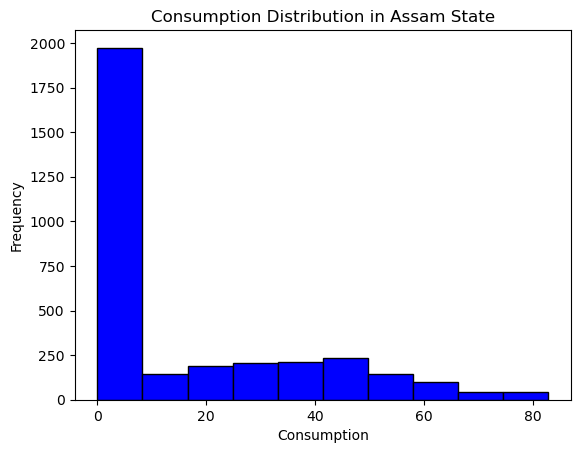

In [314]:
plt.hist(ASSM['total_consumption'], bins=10, color='blue', edgecolor='black')
plt.xlabel("Consumption")
plt.ylabel("Frequency")
plt.title("Consumption Distribution in Assam State")
plt.show()

In [315]:
ASSM_consumption = ASSM.groupby('District')['total_consumption'].sum().reset_index()

In [316]:
print(ASSM_consumption.head())

           District  total_consumption
0       Baksa Assam        1036.230462
1     Barpeta Assam        4190.159861
2  Bongaigaon Assam        1708.597183
3      Cachar Assam         903.331071
4      Chirag Assam        1198.844722


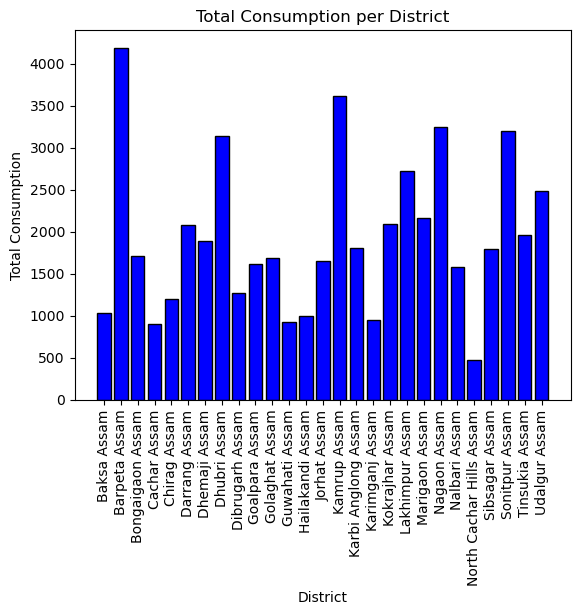

In [317]:
plt.bar(ASSM_consumption['District'], ASSM_consumption['total_consumption'], color='blue', edgecolor='black')
plt.xlabel("District")
plt.ylabel("Total Consumption")
plt.title("Total Consumption per District")
plt.xticks(rotation=90)  # Rotate district names for better visibility
plt.show()

# Load Assam district shapefile

In [318]:
data_map = gpd.read_file("C:\\Users\\Bala Vignesh.A\\Desktop\\ASSAM_DISTRICTS.geojson")

# Merge ASSM_consumption with data_map

In [319]:
print(data_map.columns)
print(ASSM_consumption.columns)

Index(['dtname', 'stname', 'stcode11', 'dtcode11', 'year_stat', 'Shape_Length',
       'Shape_Area', 'OBJECTID', 'test', 'Dist_LGD', 'State_LGD', 'geometry'],
      dtype='object')
Index(['District', 'total_consumption'], dtype='object')


In [320]:
data_map['District'] = ASSM_consumption['District']

In [321]:
data_map_data = data_map.merge(ASSM_consumption, left_on='dtname', right_on='District')

In [322]:
print(data_map.columns)

Index(['dtname', 'stname', 'stcode11', 'dtcode11', 'year_stat', 'Shape_Length',
       'Shape_Area', 'OBJECTID', 'test', 'Dist_LGD', 'State_LGD', 'geometry',
       'District'],
      dtype='object')


# Plot the data

In [323]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [324]:
data_map = gpd.read_file("C:/Users/Bala Vignesh.A/Desktop/ASSAM_DISTRICTS.geojson")

In [325]:
data_map = data_map.rename(columns={'dtname': 'District'})

In [332]:
display(data_map.rename)

<bound method DataFrame.rename of                    District stname stcode11 dtcode11 year_stat   Shape_Length  \
0                  Tinsukia  ASSAM       18      309    2011_c  487726.067498   
1                   Dhemaji  ASSAM       18      308    2011_c  459070.994852   
2                 Dibrugarh  ASSAM       18      310    2011_c  509783.046862   
3                 Lakhimpur  ASSAM       18      307    2011_c  426714.783079   
4                 Sivasagar  ASSAM       18      311    2011_c  309064.056046   
5                    Jorhat  ASSAM       18      312    2011_c  395207.912262   
6                  Sonitpur  ASSAM       18      306    2011_c  356664.951797   
7                  Golaghat  ASSAM       18      313    2011_c  696715.325801   
8                  Udalguri  ASSAM       18      326    2011_c  488761.733551   
9                   Chirang  ASSAM       18      320    2011_c  316624.721100   
10                    Baksa  ASSAM       18      324    2011_c  556608.5561

In [326]:
ASSM_consumption = pd.read_csv("C:\\Users\\Bala Vignesh.A\\Desktop\\Assignments\\SCMA 632\\NSSO68.csv", low_memory=False)


In [336]:
ASSM_consumption = ASSM.groupby('District')['total_consumption'].sum().reset_index()

In [357]:
print(ASSM_consumption.head())

           District  total_consumption
0       Baksa Assam        1036.230462
1     Barpeta Assam        4190.159861
2  Bongaigaon Assam        1708.597183
3      Cachar Assam         903.331071
4      Chirag Assam        1198.844722


In [373]:
data_map = gpd.read_file("C:\\Users\\Bala Vignesh.A\\Desktop\\ASSAM_DISTRICTS.geojson")
data_map = data_map.rename(columns={'dtname': 'total_consumption'})

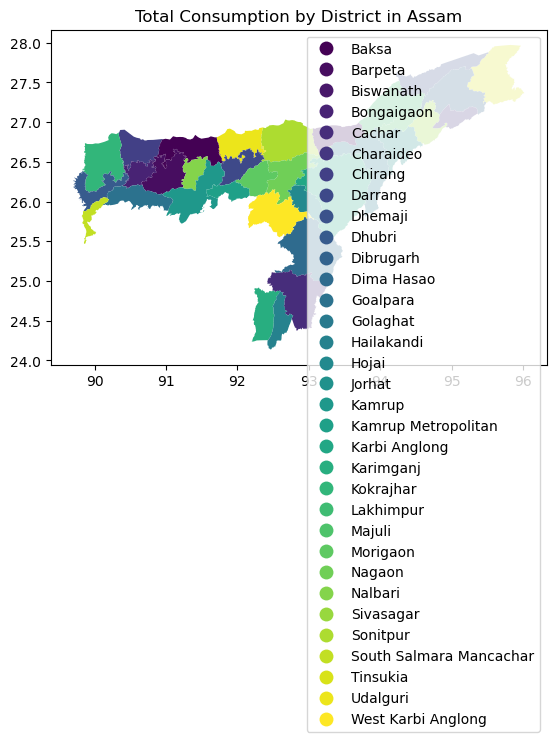

In [375]:
fig, ax = plt.subplots(1, 1)
data_map.plot(column='total_consumption', cmap='viridis', legend=True, ax=ax)
ax.set_title('Total Consumption by District in Assam')
plt.show()